<a href="https://colab.research.google.com/github/MadhavMadan336/AI-ML-LAB/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [18]:
try:
    data = yf.download('GOOG', start="2018-01-01", end="2024-12-31")
    if data.empty:
        print("Error: No data downloaded. Check ticker symbol or date range.")
        exit()
except Exception as e:
    print(f"Error downloading data: {e}")
    exit()


data_close = data[['Close']]


print("Original Data Head:")
print(data_close.head())

[*********************100%***********************]  1 of 1 completed

Original Data Head:
Price           Close
Ticker           GOOG
Date                 
2018-01-02  52.998970
2018-01-03  53.868851
2018-01-04  54.063931
2018-01-05  54.851700
2018-01-08  55.086086


In [19]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data_close.values)

sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])


X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(f"\nShape of X_train: {X.shape}")
print(f"Shape of y_train: {y.shape}")



Shape of X_train: (1700, 60, 1)
Shape of y_train: (1700,)


In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


print("\nTraining model...")

model.fit(X, y, epochs=10, batch_size=32, verbose=1)

print("\nMaking predictions...")
predicted_scaled = model.predict(X)


Training model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0415
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0011
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 9.9156e-04
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 8.3119e-04
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 8.5571e-04
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 8.0714e-04
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 8.7826e-04
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 7.4147e-04
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 6.8466e-04
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.8649e-04

Making predictions...
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [21]:
if y.ndim == 1:
    y_reshaped = y.reshape(-1, 1)
else:
    y_reshaped = y

predicted_prices = scaler.inverse_transform(predicted_scaled)
actual_prices = scaler.inverse_transform(y_reshaped)


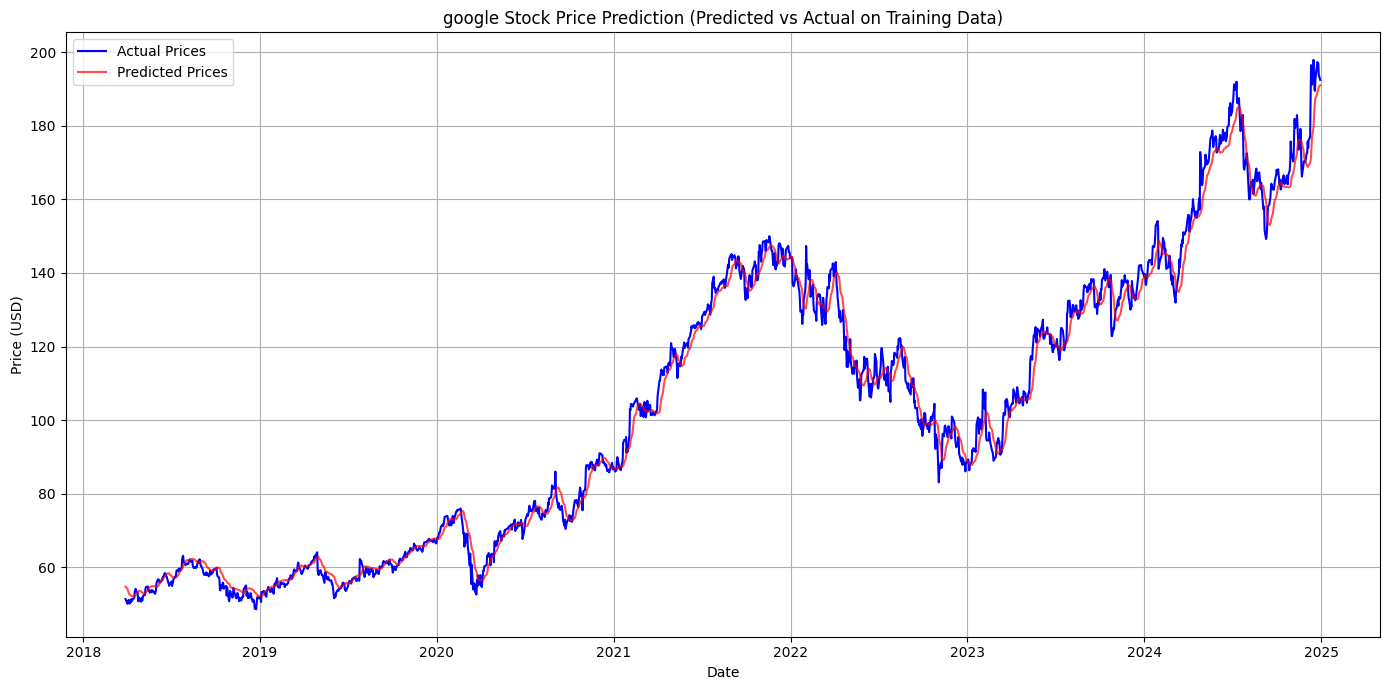

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(data_close.index[sequence_length:], actual_prices, label='Actual Prices', color='blue') # Use date index for x-axis
plt.plot(data_close.index[sequence_length:], predicted_prices, label='Predicted Prices', color='red', alpha=0.7) # Corrected label quote and use date index
plt.title('google Stock Price Prediction (Predicted vs Actual on Training Data)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()